<a href="https://colab.research.google.com/github/NirmalVignu/ML-Project1/blob/master/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this model we are going to predict breast cancer by using data from UCI Machine Learning Repository

**Data Set Information:**

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)

Group 2: 70 instances (October 1989)

Group 3: 31 instances (February 1990)

Group 4: 17 instances (April 1990)

Group 5: 48 instances (August 1990)

Group 6: 49 instances (Updated January 1991)

Group 7: 31 instances (June 1991)

Group 8: 86 instances (November 1991)

-----------------------------------------
Total: 699 points (as of the donated datbase on 15 July 1992)





**Attribute Information:**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

# **1 Importing Dats sets and libraries**

In [8]:
#uploading file
from google.colab import files
uploaded=files.upload()

In [9]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Importing dataset
data=pd.read_csv('breast_cancer.csv')
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [13]:
data.shape #no of rows and columns

(683, 11)

In [14]:
data.info() #it gives total info such as no of non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [15]:
data.describe().transpose()#describe() is used to view some basic statistical details like percentile, mean, std etc

,count,mean,std,min,25%,50%,75%,max
Sample code number,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


In [16]:
data.isnull().sum() #is used to find null values in the taken data

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [20]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

here we are taken from the secon column in x because first column sample code number doesn't effect our data

In [23]:
print("X:",x)
print("Y:",y)


X: [[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]
Y: [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 

# Analysing Data


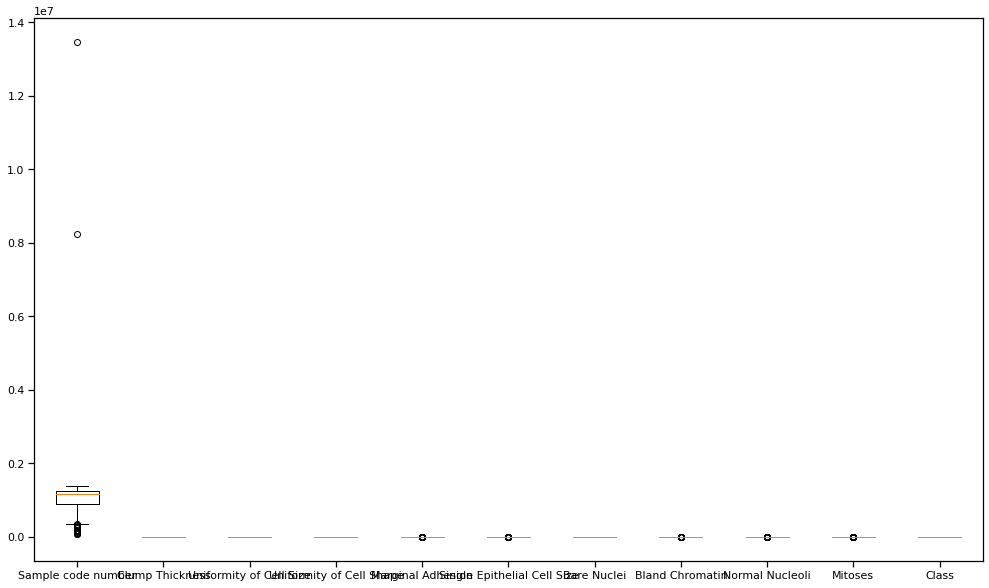

In [24]:
plt.figure(figsize=(17,10))
plt.boxplot(data.values,labels=data.columns)
plt.show()

There Are no outliers

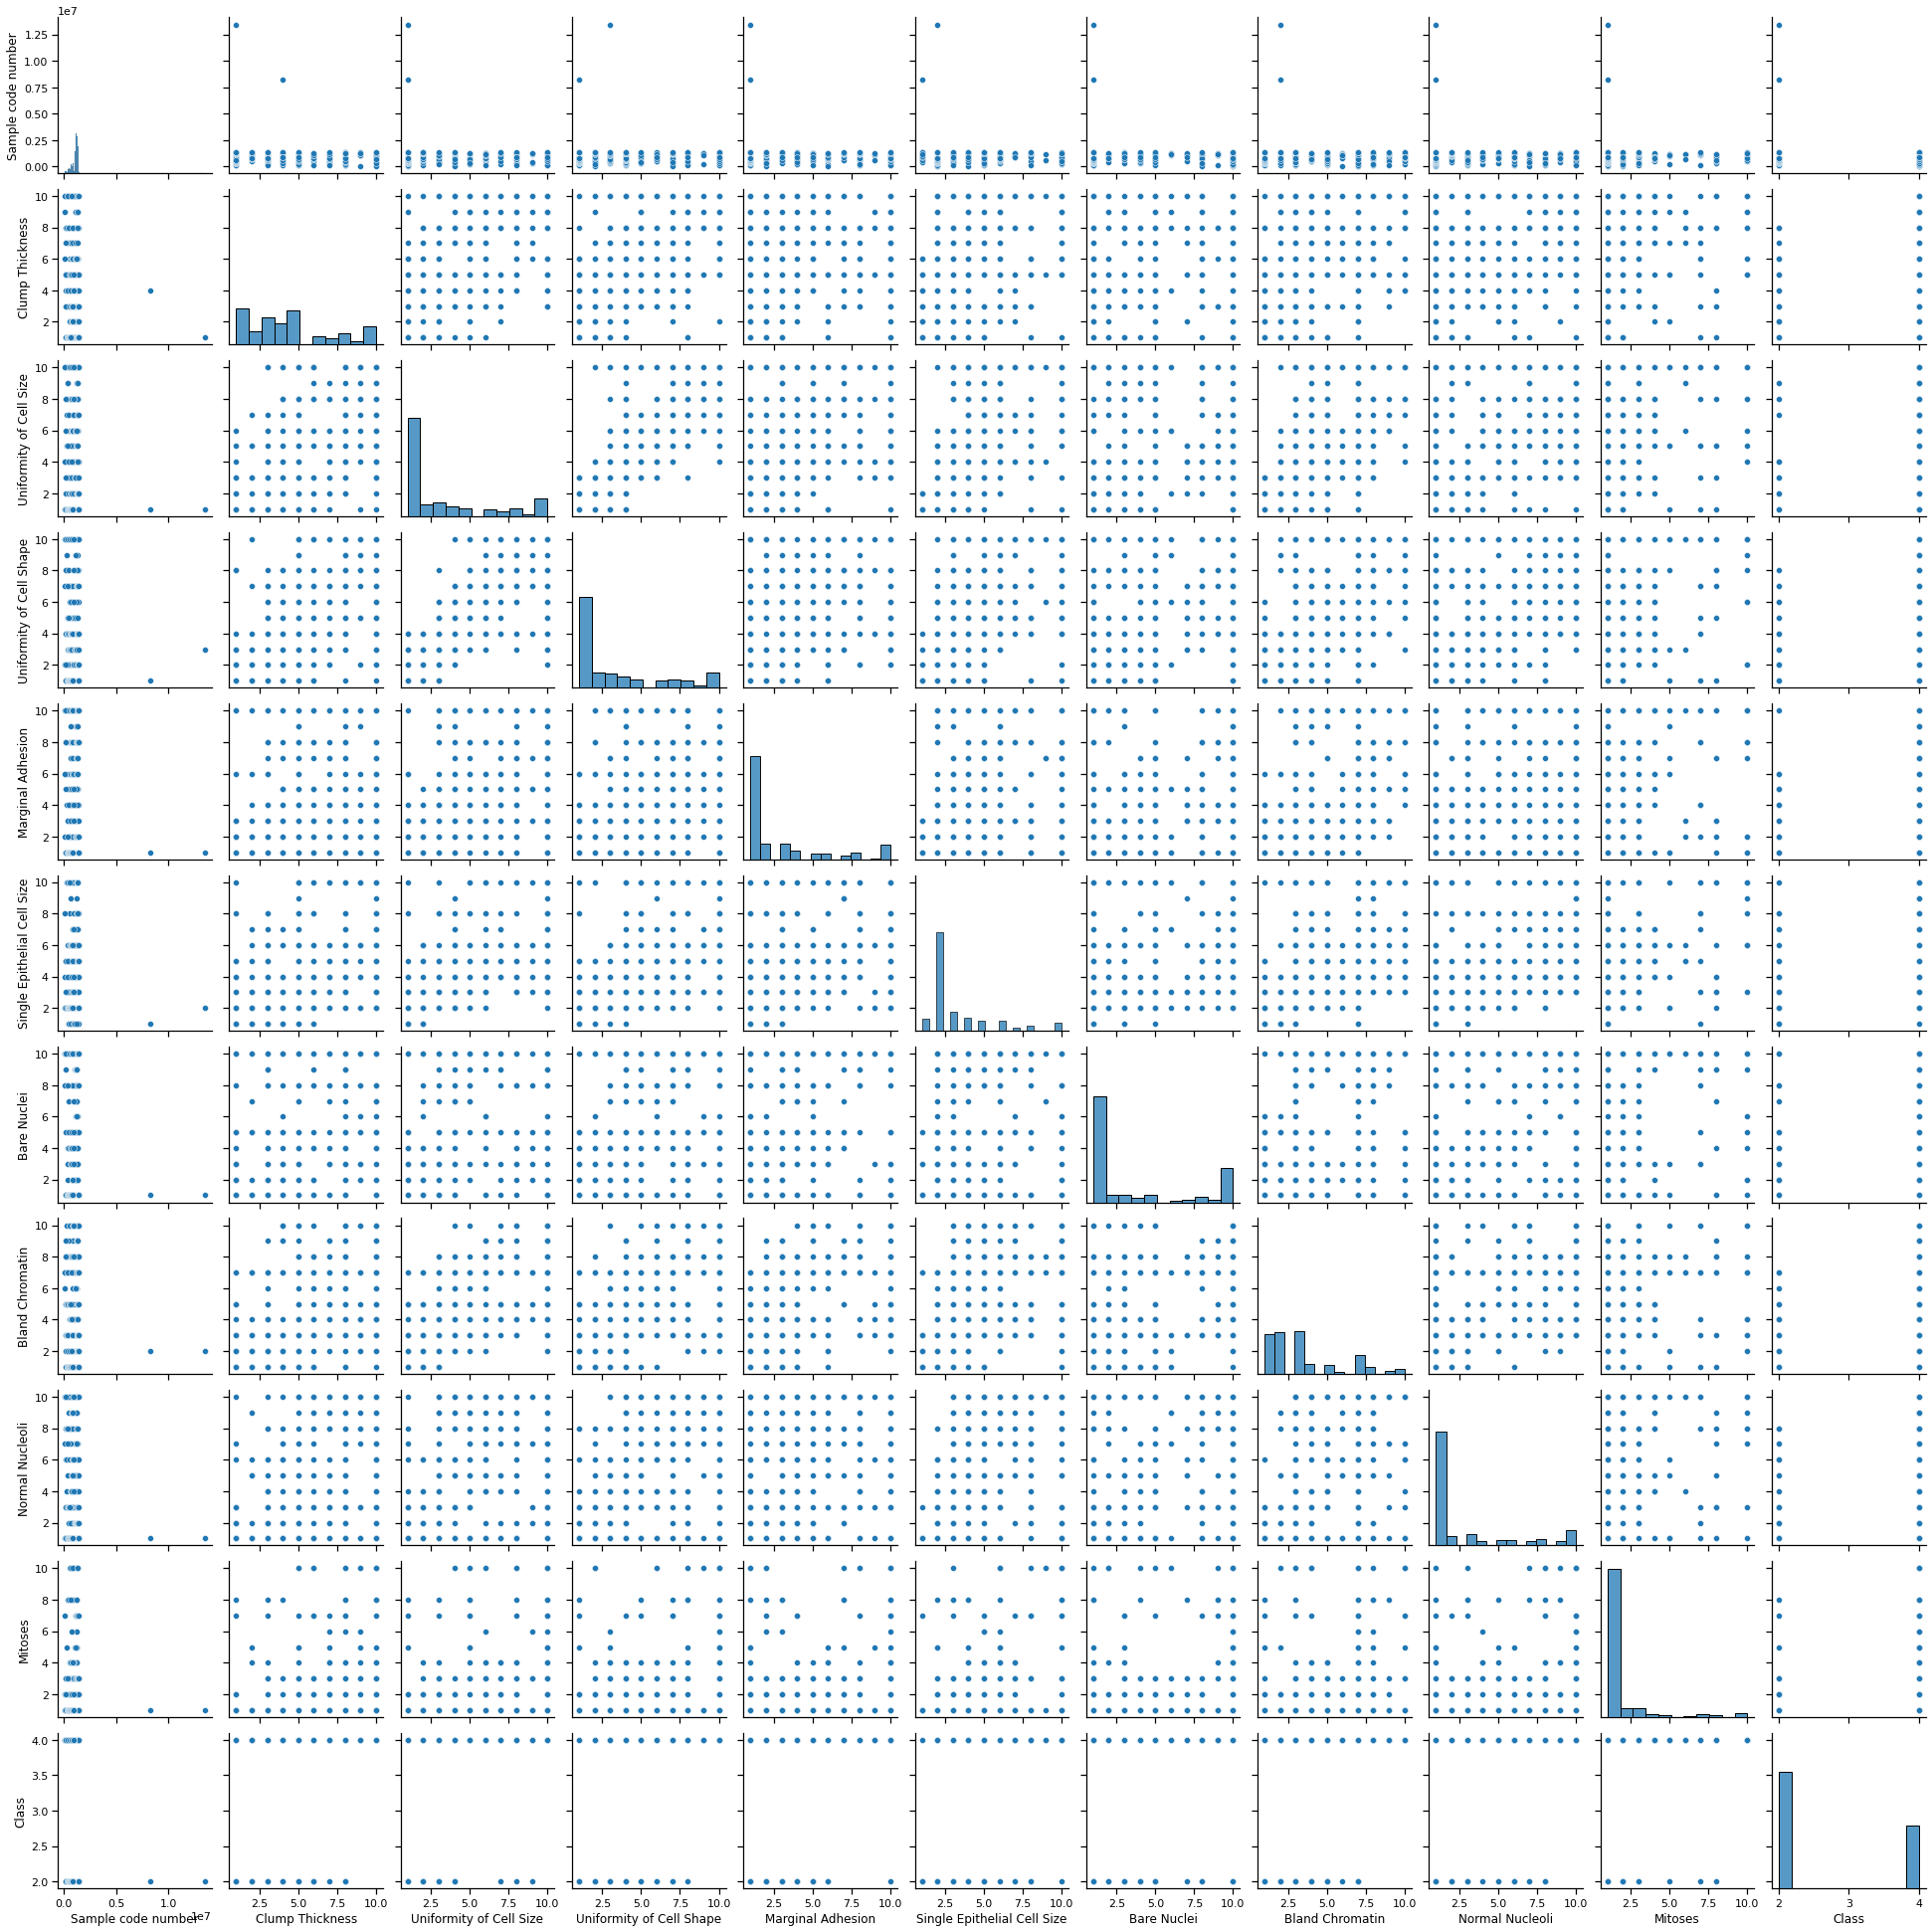

In [25]:
sns.pairplot(data)

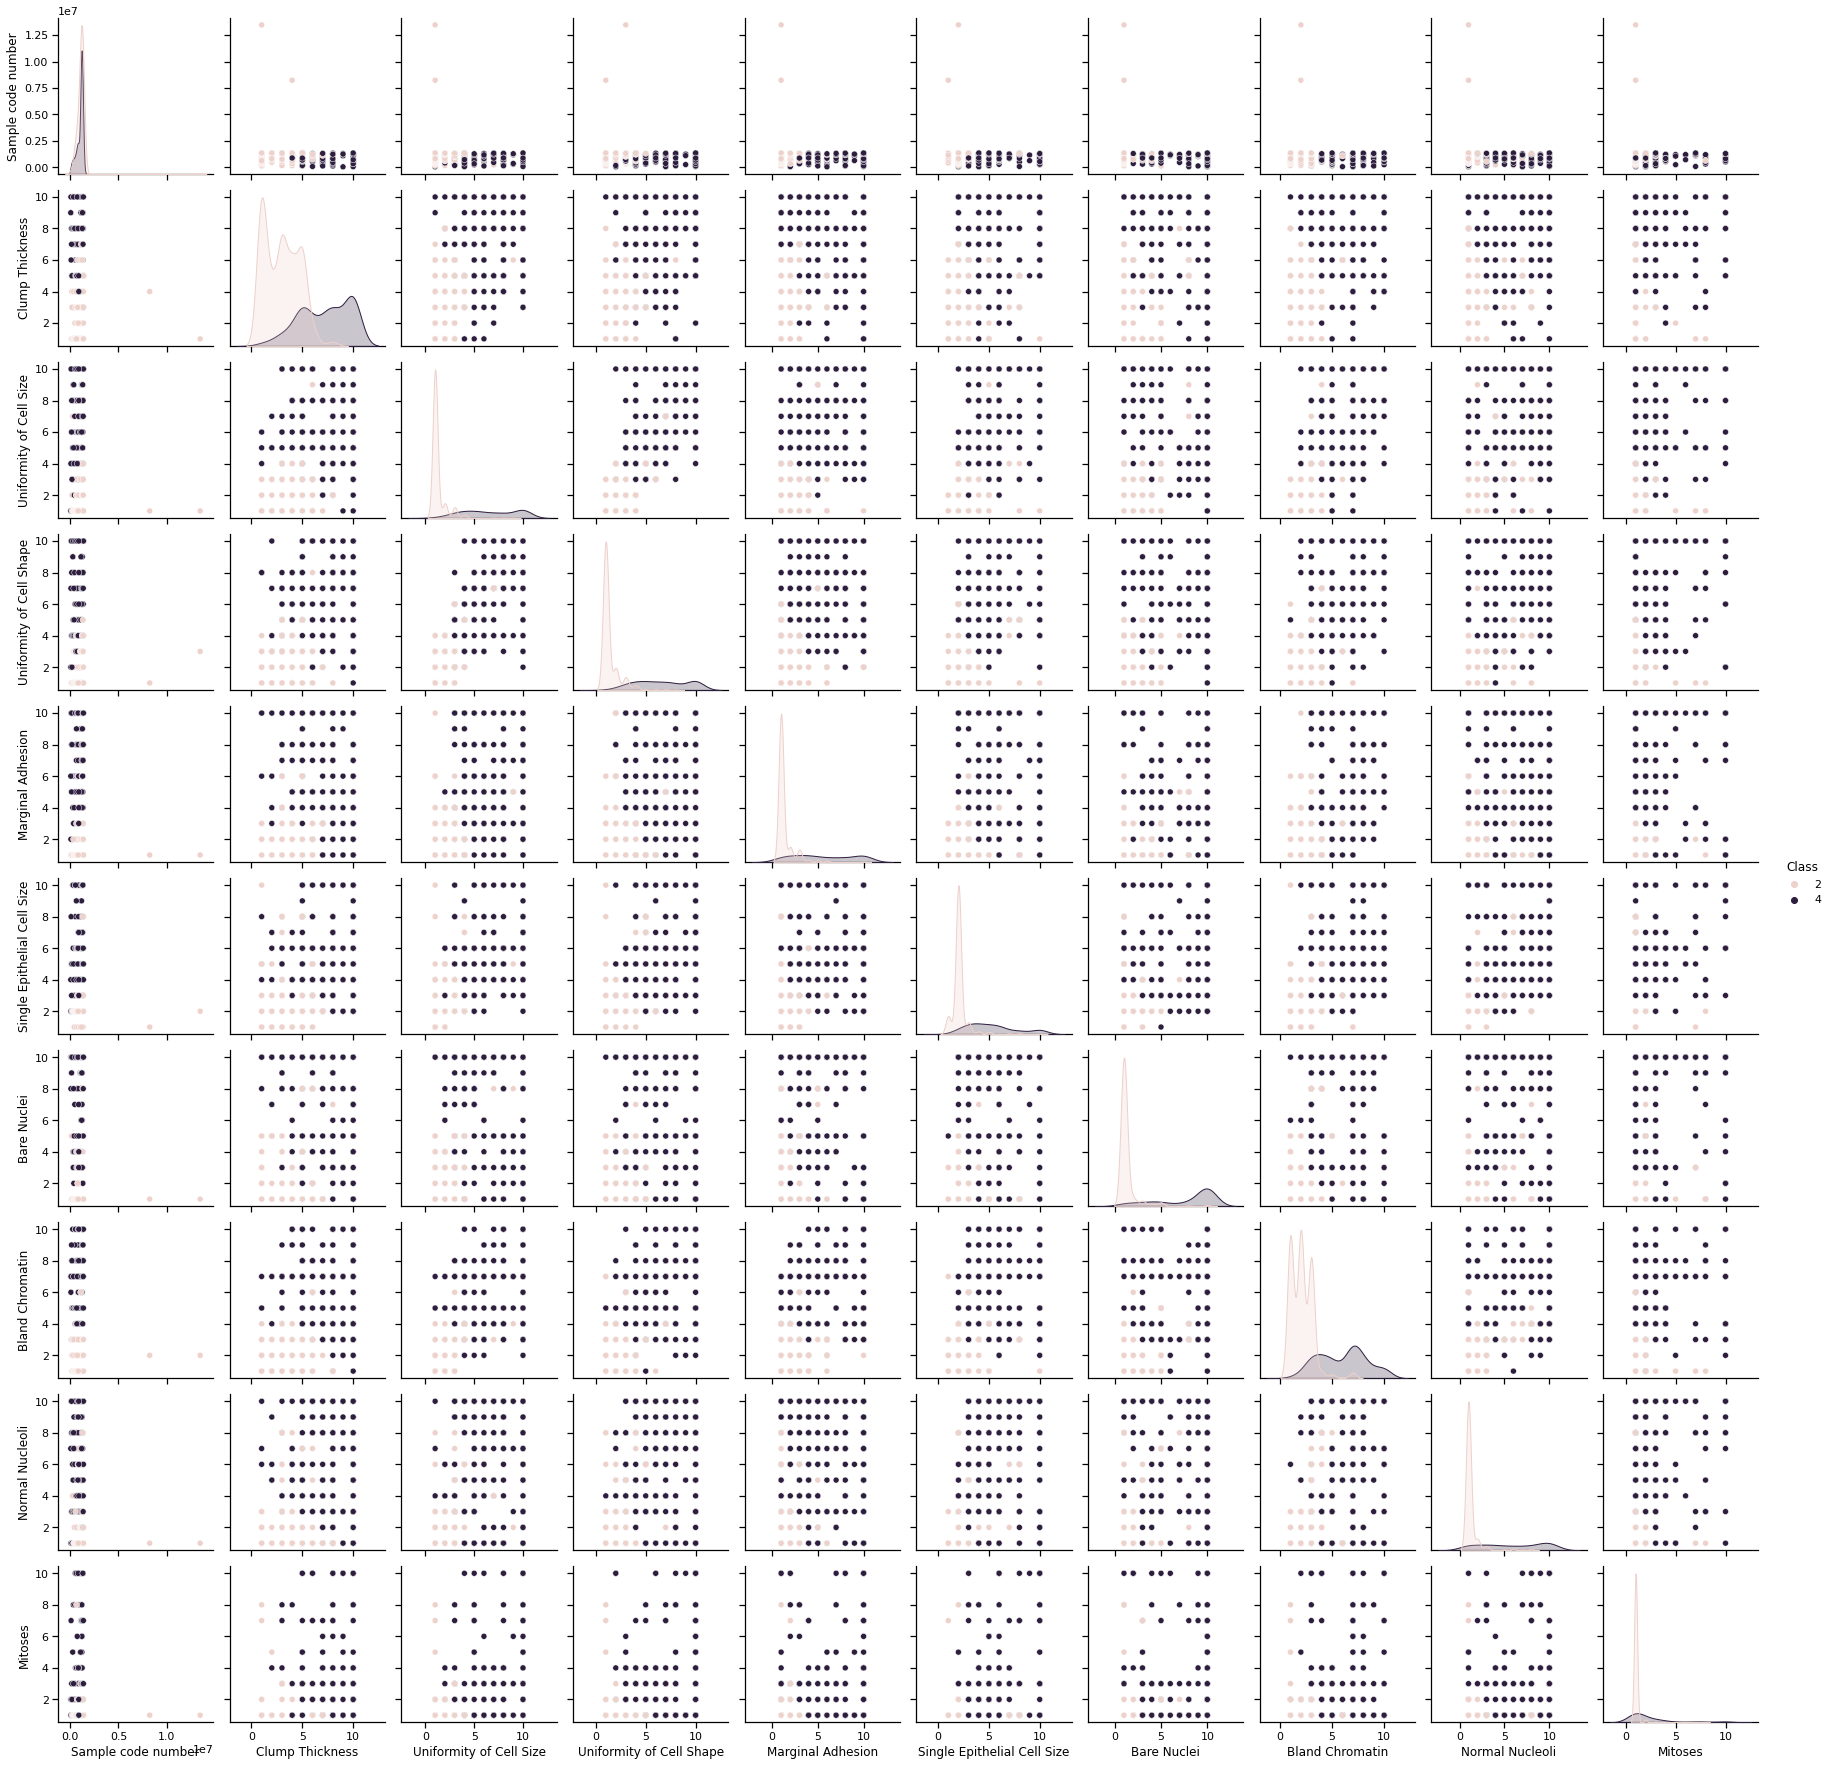

In [26]:
sns.pairplot(data,diag_kind='kde',hue='Class')

# Splitting data to train and test in 70:30 ratio by using sklearn library

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train,x_test,y_train,y_test

(array([[ 8,  6,  4, ...,  3,  1,  1],
        [ 4,  1,  1, ...,  2,  1,  1],
        [ 8, 10,  8, ...,  7,  7,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 3,  1,  1, ...,  2,  1,  1],
        [10,  9,  7, ...,  7,  7,  1]]), array([[ 1,  1,  1, ...,  1,  1,  1],
        [ 3,  1,  1, ...,  2,  1,  1],
        [ 5,  5,  5, ...,  4,  3,  1],
        ...,
        [ 3,  1,  2, ...,  1,  1,  1],
        [ 3,  1,  1, ...,  2,  1,  1],
        [10,  8,  4, ...,  3, 10,  4]]), array([4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2,
        4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2,
        2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2,
        2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
        4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
        2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4,
        2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4

#  Applying Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting test results

In [30]:
y_predict=classifier.predict(x_test)
y_predict

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4])

# Evaluating Model Performance

**Confusion matrix**

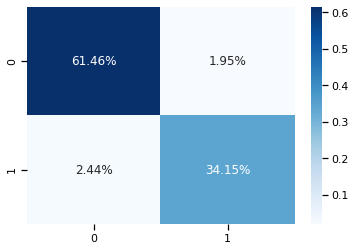

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

here from confusion matrix we can say 

our model predicts 

61.46%-benign correctly

1.95%-benign incorrectly

and


34.15%-malignant correctly

2.44%-malignant incorrectly

here we have 95.61% correct predictions

**Accuracy Score**

In [36]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_predict)


0.9560975609756097

In [38]:
print("Accuracy of our model is:",ac*100)

Accuracy of our model is: 95.60975609756098


**Computing the Accuracy with k-Fold cross validation**

In [44]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[0.95833333 0.97916667 1.         0.9375     0.97916667 0.97916667
 0.97916667 0.95833333 0.9787234  0.93617021]
Accuracy: 96.86 %
Standard Deviation: 1.94 %
